In [41]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

In [42]:
import os
os.listdir()

['Housing.csv',
 'Simple+Linear+Regression+in+Python.ipynb',
 'Multiple+Linear+Regression+-+Housing+Case+Study.ipynb',
 '.DS_Store',
 'Linear Regression Assignment.ipynb',
 'CarPrice_Assignment.csv',
 '.ipynb_checkpoints',
 'Data Dictionary - carprices.xlsx',
 'Housing+Case+Study+using+RFE.ipynb',
 'Linear+Regression+Subjective+Questions.docx']

## Data Exploration

In [43]:
df = pd.read_csv("CarPrice_Assignment.csv")
print(df.shape)
df.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [44]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## Data Preparation

In [46]:
# Splitting Car Name into two columns
x = df["CarName"].str.split(" ", n = 1, expand = True) 
df["CarBrand"] = x[0]
df["CarName"] = x[1]
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [47]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarBrand'],
      dtype='object')

In [48]:
df["CarBrand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [49]:
# Replacing maxda with mazda,  nissan with Nissan, porcshce with porsche, toyouta with toyota, 
#vokswagen, vw with volkswagen

df["CarBrand"] = df["CarBrand"].str.replace("maxda", "mazda")
df["CarBrand"] = df["CarBrand"].str.replace("nissan", "Nissan")
df["CarBrand"] = df["CarBrand"].str.replace("porcshce", "porsche")
df["CarBrand"] = df["CarBrand"].str.replace("toyouta", "toyota")
df["CarBrand"] = df["CarBrand"].str.replace("vokswagen|vw", "volkswagen")
df["CarBrand"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [50]:
df["CarName"].unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [51]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [52]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'CarBrand'],
      dtype='object')

In [53]:
df["enginetype"].nunique()

7

- Fuel type, aspiration, symboling, doornumber, carbody, enginelocation, drivewheel, enginetype, cylindernumber, fuelsystem, CarBrand  --- Categorical Variables 

       - convering these above variables into dummy variables

In [54]:
cat_vars = ["fueltype", "aspiration", "symboling", "carbody", "doornumber", "enginelocation", "drivewheel","enginetype", "cylindernumber", 
            "fuelsystem", "CarBrand"]

def category_conversion(x):
    return x.astype("category")

# Applying the function to cat_vars
df[cat_vars] = df[cat_vars].apply(category_conversion)


dummy_variables = pd.get_dummies(df[cat_vars], drop_first=True)

df = pd.concat([df, dummy_variables], axis =1)

#Removing cat_vars in df
df.drop(cat_vars, axis =1, inplace =True)
df.head()

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,CarBrand_mitsubishi,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,1,giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,2,stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,3,Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,4,100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,5,100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df.columns

Index(['car_ID', 'CarName', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'doornumber_two',
       'enginelocation_rear', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CarBrand_alfa-romero', 'CarBrand_audi', 'CarBrand_bmw'

In [56]:
df[["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio",
   "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 720x360 with 0 Axes>

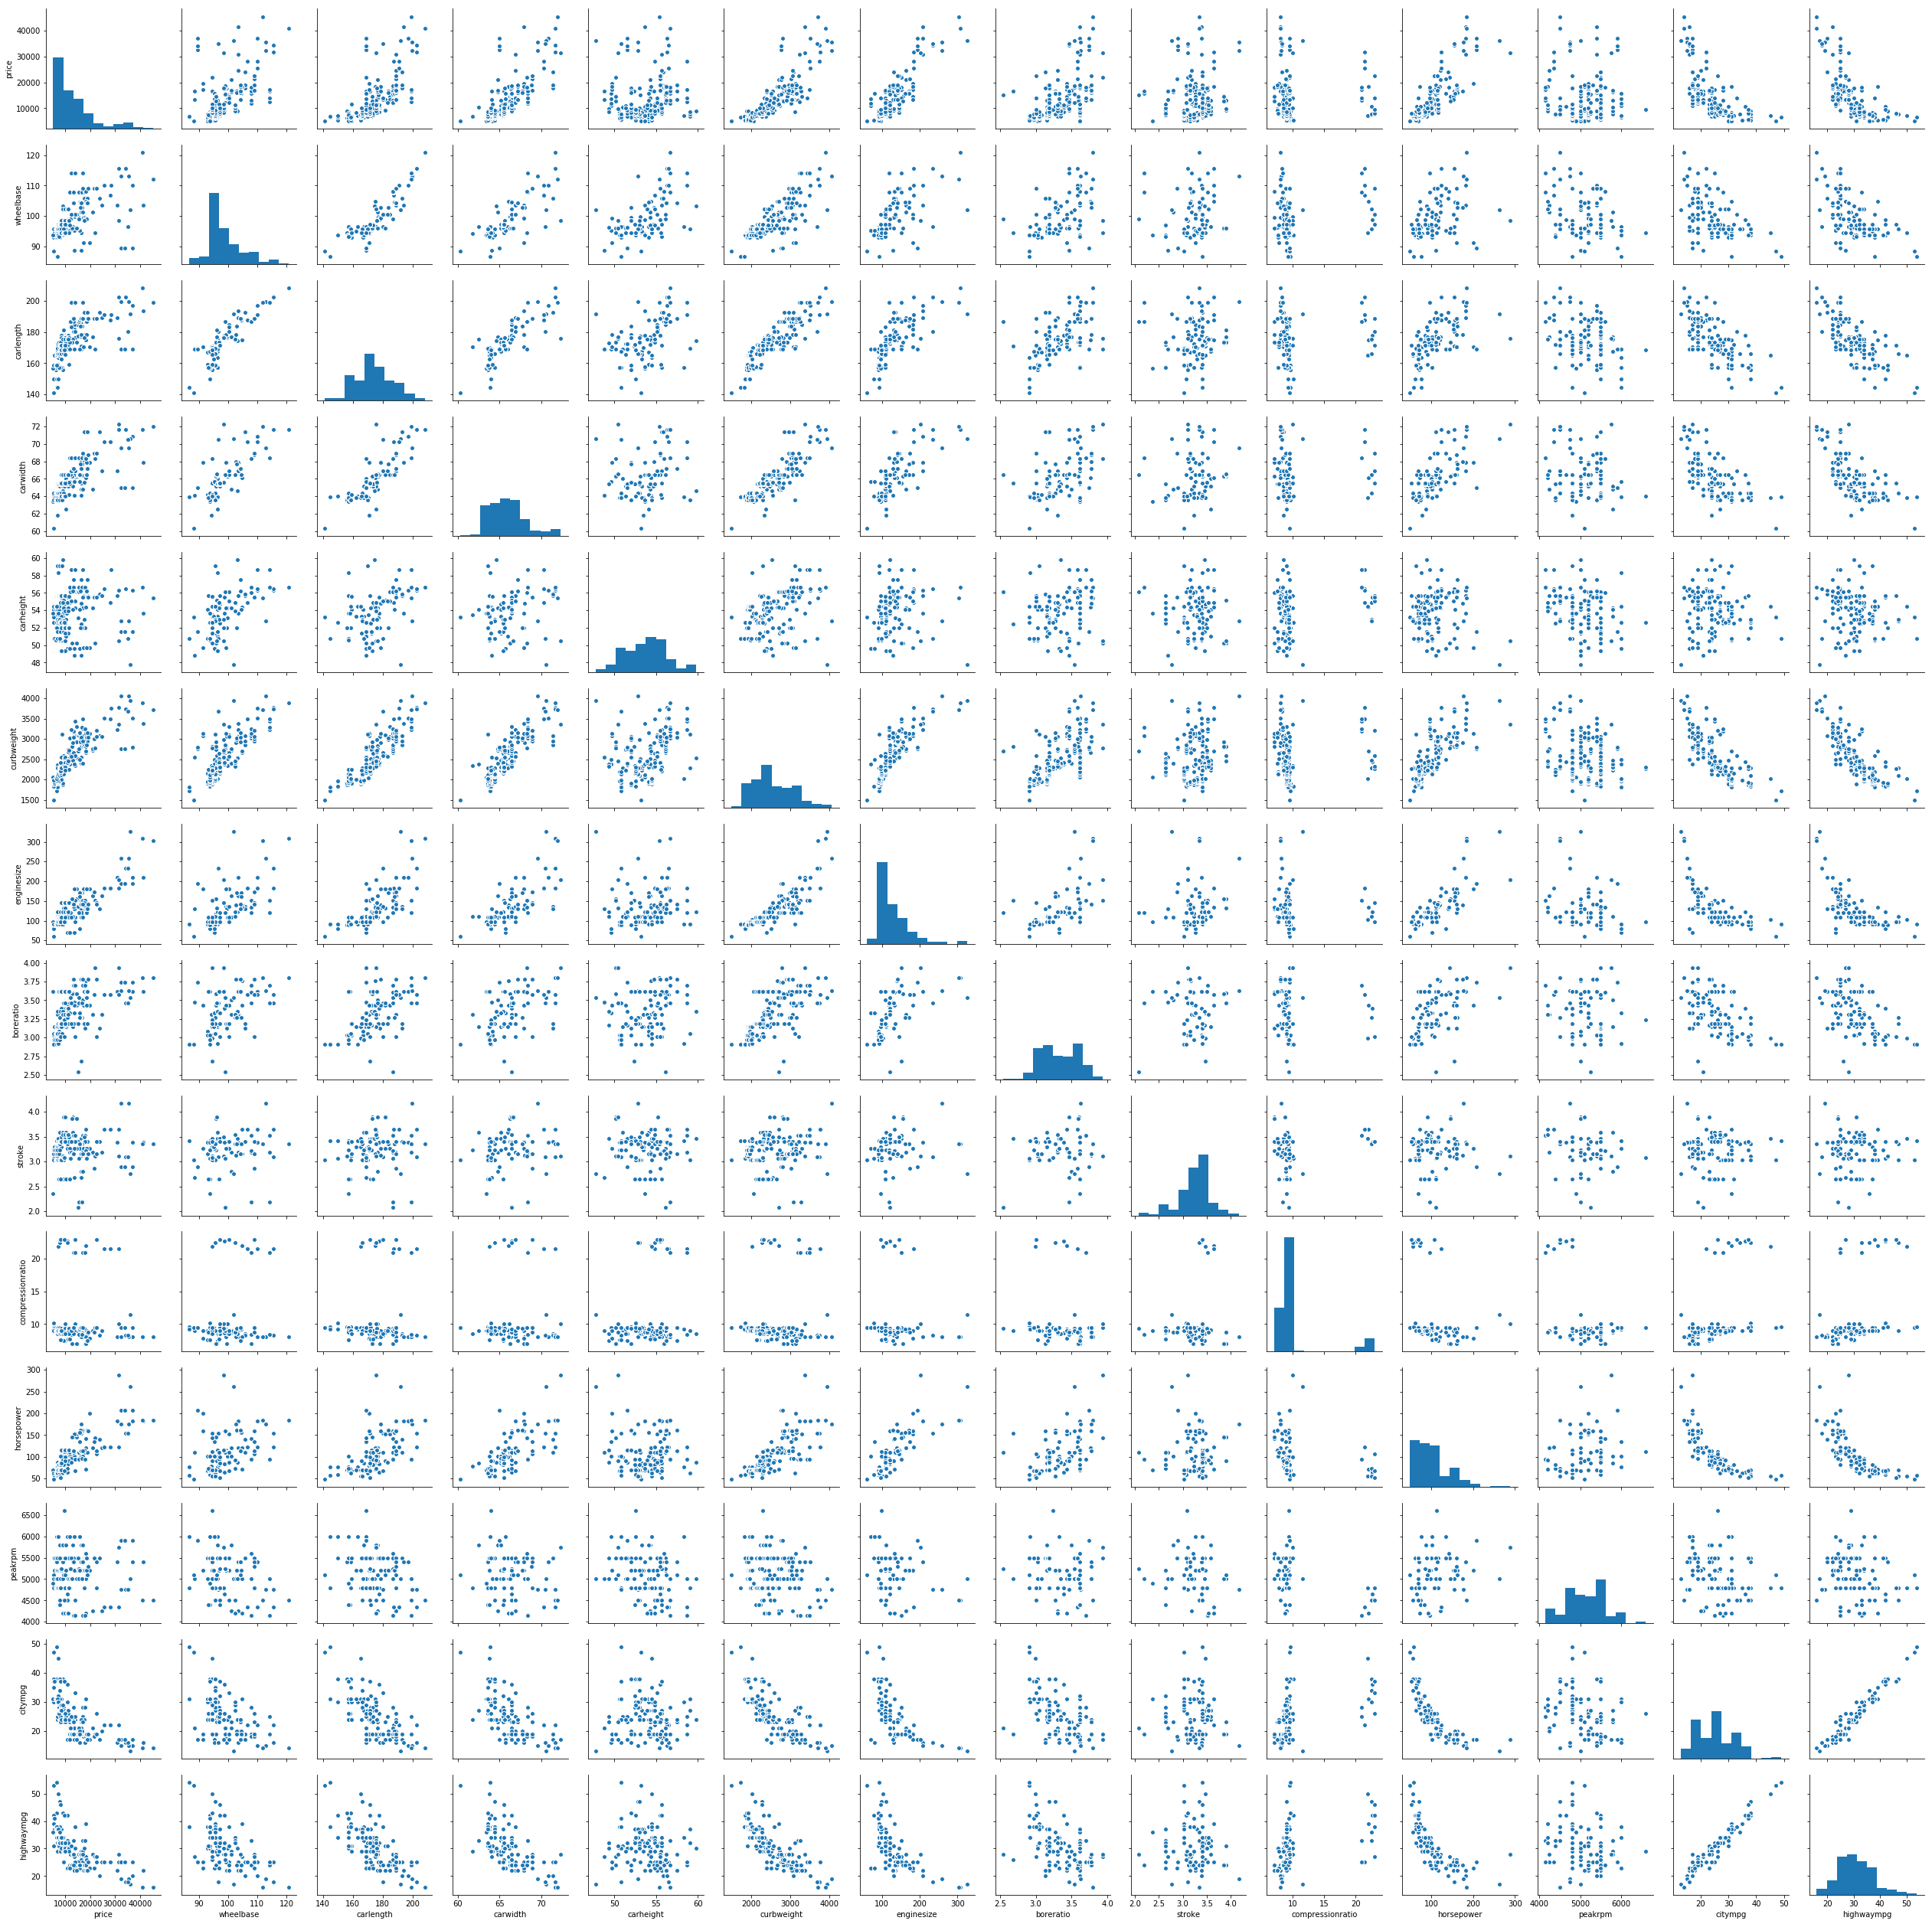

In [57]:
# these below variables are numerical variables
num_vars = ["price", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", 
            "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]

plt.figure(figsize = (10, 5))

sns.pairplot(df[num_vars])
plt.show()

From the above pairplot
- wheelbase, carlength, carwidth, curbweight, enginesize, bore ratio, horsepower has linear relation to the price
- peakrpm, compression ratio, car height  has less linearity with price

# Splitting dat into Training and Test datasets

In [58]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print("{} is splitted into training data of shape{} and testing data of shape{}".format(df.shape, df_train.shape, df_test.shape))

(205, 71) is splitted into training data of shape(143, 71) and testing data of shape(62, 71)


In [59]:
# Normalising the Numerical Variables
#Removing Price
num_vars = ["wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", 
            "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,CarBrand_mitsubishi,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
122,123,fury gran sedan,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,0,0,1,0,0,0,0,0,0,0
125,126,macan,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0,0,0,1,0,0,0,0,0,0
166,167,corolla tercel,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,1,0,0
1,2,stelvio,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0,0,0,0,0,0,0,0,0,0
199,200,diesel,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0,0,0,0,0,0,0,0,0,1


In [60]:
# Car_ID and carName are Identitites removing from both train and test datasets
train_id, test_id = df_train[["car_ID", "CarName"]], df_test[["car_ID", "CarName"]]

df_train.drop(["car_ID", "CarName"], axis = 1, inplace=True)
df_test.drop(["car_ID", "CarName"], axis = 1, inplace=True)

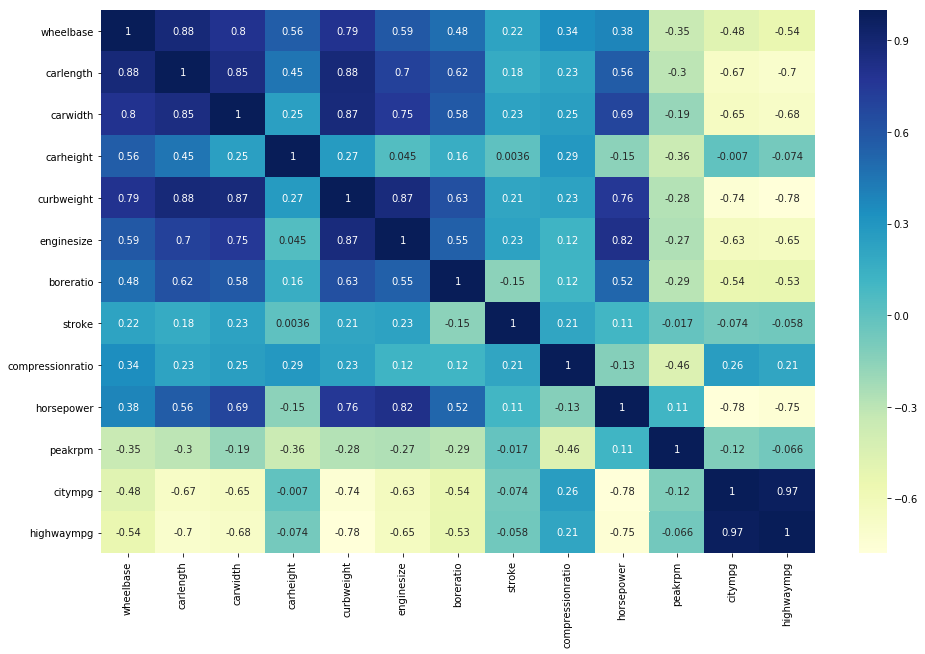

In [61]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

# Building the model


In [62]:
# splitting datset into x_train and y_train
y_train = df_train.pop('price')
X_train = df_train

In [63]:
X_train.shape, y_train.shape

((143, 68), (143,))

In [64]:
# Removing the insignifacnt variables with RFE method upto 15 variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 12),
 ('carlength', False, 16),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 20),
 ('horsepower', False, 10),
 ('peakrpm', False, 11),
 ('citympg', False, 30),
 ('highwaympg', False, 21),
 ('fueltype_gas', False, 19),
 ('aspiration_turbo', False, 9),
 ('symboling_-1', False, 32),
 ('symboling_0', False, 40),
 ('symboling_1', False, 41),
 ('symboling_2', False, 38),
 ('symboling_3', False, 42),
 ('carbody_hardtop', False, 26),
 ('carbody_hatchback', False, 25),
 ('carbody_sedan', False, 27),
 ('carbody_wagon', False, 28),
 ('doornumber_two', False, 45),
 ('enginelocation_rear', True, 1),
 ('drivewheel_fwd', False, 49),
 ('drivewheel_rwd', False, 36),
 ('enginetype_dohcv', False, 7),
 ('enginetype_l', False, 2),
 ('enginetype_ohc', False, 46),
 ('enginetype_ohcf', False, 5),
 ('enginetype_ohcv', False, 37),
 ('enginetype_rotor', True,

In [66]:
col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas', 'aspiration_turbo',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'doornumber_two', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CarBrand_alfa-romero', 'CarBrand_audi', 'CarBrand_buick',
       'CarBrand_chevrolet', 'CarBrand_dodge', 'CarBrand_honda',
       'CarBrand_isuzu', 'CarBrand_jaguar', 'CarBrand_mazda',
       'CarBrand_mercury', 'CarBrand_mitsubishi', 'CarBrand_plymouth',
       'CarBrand_renault', 'CarBrand_saab', 'CarBrand_subaru',
       'CarBrand

In [67]:
X_train_rfe = X_train[col]

In [68]:
X_train_rfe.shape

(143, 15)

In [69]:
#Buliding model using stats.model.api
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.03e-70
Time:                        15:10:42   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4908.55

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,enginetype_rotor,inf
12,cylindernumber_two,inf
0,const,65.220000
3,enginesize,27.430000
9,cylindernumber_four,13.230000
2,curbweight,11.400000
1,carwidth,6.060000
4,boreratio,5.630000
11,cylindernumber_twelve,3.050000
8,cylindernumber_five,2.910000


In [71]:
# Removing enginesize from X_train_rfe

X_train_rfe.drop("enginesize", axis = 1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           5.01e-61
Time:                        15:10:56   Log-Likelihood:                -1311.3
No. Observations:                 143   AIC:                             2651.
Df Residuals:                     129   BIC:                             2692.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -815.27

In [72]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_rotor,inf
11,cylindernumber_two,inf
0,const,55.570000
2,curbweight,9.110000
1,carwidth,6.030000
8,cylindernumber_four,5.500000
3,boreratio,3.330000
14,CarBrand_porsche,1.890000
5,enginelocation_rear,1.740000
7,cylindernumber_five,1.640000


In [73]:
# Removing cylindernumber_four from X_train_rfe

X_train_rfe.drop("cylindernumber_four", axis = 1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.72e-62
Time:                        15:11:20   Log-Likelihood:                -1311.3
No. Observations:                 143   AIC:                             2649.
Df Residuals:                     130   BIC:                             2687.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1002.90

In [74]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_rotor,inf
10,cylindernumber_two,inf
0,const,26.320000
1,carwidth,5.890000
2,curbweight,5.610000
3,boreratio,2.310000
13,CarBrand_porsche,1.850000
5,enginelocation_rear,1.640000
7,cylindernumber_five,1.420000
4,stroke,1.340000


In [75]:
# Removing cylindernumber_five from X_train_rfe

X_train_rfe.drop("cylindernumber_five", axis = 1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.37e-63
Time:                        15:11:29   Log-Likelihood:                -1311.4
No. Observations:                 143   AIC:                             2647.
Df Residuals:                     131   BIC:                             2682.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -956.99

In [76]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,enginetype_rotor,inf
9,cylindernumber_two,inf
0,const,25.760000
2,curbweight,5.590000
1,carwidth,4.990000
3,boreratio,2.190000
12,CarBrand_porsche,1.810000
5,enginelocation_rear,1.620000
4,stroke,1.340000
11,CarBrand_peugeot,1.180000


In [77]:
# Removing stroke from X_train_rfe

X_train_rfe.drop("stroke", axis = 1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.72e-64
Time:                        15:11:42   Log-Likelihood:                -1311.6
No. Observations:                 143   AIC:                             2645.
Df Residuals:                     132   BIC:                             2678.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1497.98

In [78]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,enginetype_rotor,inf
8,cylindernumber_two,inf
0,const,11.730000
2,curbweight,5.410000
1,carwidth,4.910000
3,boreratio,1.890000
11,CarBrand_porsche,1.810000
4,enginelocation_rear,1.620000
10,CarBrand_peugeot,1.170000
7,cylindernumber_twelve,1.070000


In [79]:
# Removing enginetype_rotor from X_train_rfe

X_train_rfe.drop("enginetype_rotor", axis = 1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           4.72e-64
Time:                        15:11:45   Log-Likelihood:                -1311.6
No. Observations:                 143   AIC:                             2645.
Df Residuals:                     132   BIC:                             2678.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1497.98

In [80]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.73
2,curbweight,5.41
1,carwidth,4.91
3,boreratio,1.89
10,CarBrand_porsche,1.81
4,enginelocation_rear,1.62
9,CarBrand_peugeot,1.17
6,cylindernumber_twelve,1.07
8,CarBrand_bmw,1.07
5,cylindernumber_three,1.06


In [81]:
# Removing cylindernumber_two from X_train_rfe

X_train_rfe.drop("cylindernumber_two", axis = 1, inplace=True)

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 02 Sep 2019   Prob (F-statistic):           1.09e-64
Time:                        15:12:00   Log-Likelihood:                -1312.8
No. Observations:                 143   AIC:                             2646.
Df Residuals:                     133   BIC:                             2675.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1489.96

In [82]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.73
2,curbweight,5.38
1,carwidth,4.89
3,boreratio,1.88
9,CarBrand_porsche,1.80
4,enginelocation_rear,1.62
8,CarBrand_peugeot,1.16
6,cylindernumber_twelve,1.07
7,CarBrand_bmw,1.07
5,cylindernumber_three,1.06


- This above model is final model with R^2 = 0.909

# Residual Analysis of Data

In [83]:
y_train_price = lm.predict(X_train_rfe)

Text(0.5,0,'Errors')

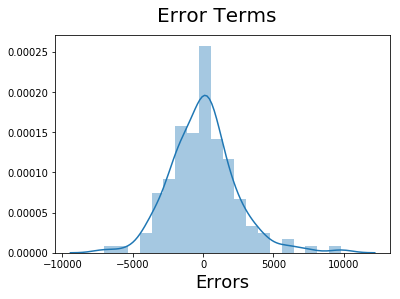

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

# Making Predictions and Model Evaluvation

In [85]:
# Applying normalisation on scaling

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [86]:
X_train_rfe.columns

Index(['const', 'carwidth', 'curbweight', 'boreratio', 'enginelocation_rear',
       'cylindernumber_three', 'cylindernumber_twelve', 'CarBrand_bmw',
       'CarBrand_peugeot', 'CarBrand_porsche'],
      dtype='object')

In [87]:
y_test = df_test.pop('price')
X_test = df_test

In [88]:
# Now let's use our model to make predictions.
X_test_new = sm.add_constant(X_test)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test_new[X_train_rfe.columns]

# Adding a constant variable 


In [89]:
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

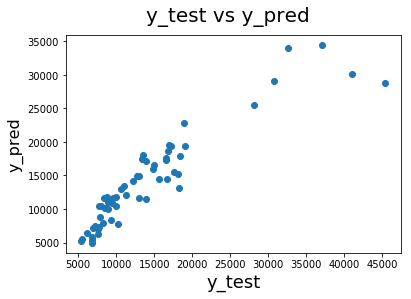

In [90]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8487831754075021